In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from tqdm import tqdm
from key_gen import KeyGen
from lsa import *

In [2]:
"""plot the decryption distribution"""
key_gen_alice = KeyGen()
with open("text.txt", "r") as f:
    text = f.read()
len_text = len(text)

z_vals = np.zeros((2, len_text), dtype=int)
char_same = CHARS[-4]
char_index_same = CHARS_DICT[char_same]
for idx, char in enumerate(tqdm(text)):
    key = next(key_gen_alice)
    try:
        char_index = CHARS_DICT[char]
        z_vals[0, idx], _ = get_cipher(key, char_index)
        z_vals[1, idx], _ = get_cipher(key, char_index_same)
    except KeyError:
        continue


100%|██████████| 865256/865256 [01:10<00:00, 12236.57it/s]


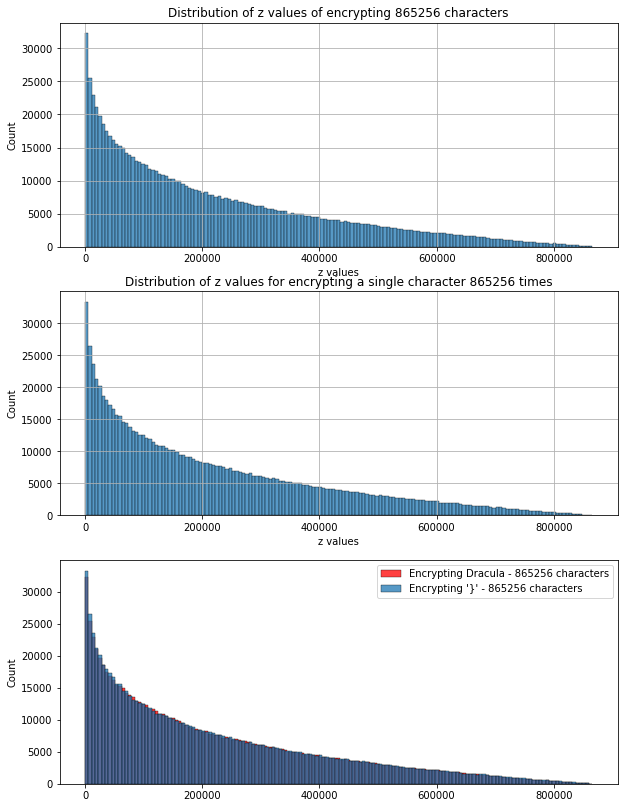

<Figure size 720x504 with 0 Axes>

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))
title = f"Distribution of z values of encrypting {len_text} characters"
title_same = f"Distribution of z values for encrypting a single character {len_text} times"

axes[0].title.set_text(title)
axes[1].title.set_text(title_same)
axes[0].set_xlabel("z values")
axes[1].set_xlabel("z values")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("Count")
axes[0].grid()
axes[1].grid()
sns.histplot(z_vals[0], bins="auto", ax=axes[0])
sns.histplot(z_vals[1], bins="auto", ax=axes[1])

plt.figure(figsize=(10, 7))

sns.histplot(z_vals[0], bins="auto", ax=axes[2], color="red", label=f"Encrypting Dracula - {len_text} characters")
sns.histplot(z_vals[1], bins="auto", ax=axes[2], label=f"Encrypting '{char_same}' - {len_text} characters")
axes[2].legend()

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import ks_2samp
rng = range(z_vals.min(), z_vals.max() + 1)
hist = np.histogram(z_vals[0], bins=rng)[0]
hist_same = np.histogram(z_vals[1], bins=rng)[0]
ks_2samp(hist, hist_same)

KstestResult(statistic=0.02754102531484548, pvalue=6.531499055734263e-187)